<img src="https://raw.githubusercontent.com/aaa121/Exploratory-Data-Analysis/master/EDA-banner.jpg"/>

** by: **

**                      Akinwande Atanda | University of Canterbury | New Zealand **

### EDA: Introduction
EDA is the statistical approach for examining data sets by summarising their key features and chracteristics through visualization and descriptive statistics. An EDA might also include hypothesis testing and modelling.

One of the advantages of EDA techniques in the field of data mining and big data analytics is that it provide the support for selecting the appropriate statistical tools for fitting a dataset. The process of conducting EDA to make informed business or operational decisions are shown in the figure below:
<img src="https://raw.githubusercontent.com/aaa121/Exploratory-Data-Analysis/master/EDA_In_Data_Processing.png"/>

The Iris data set is used to perform EDA. The analyses covered here include the following:
* Data Summary
* Data Visualization
* Hypothesis Testing
* Metrics Evaluation
* Simulation
* Bootstrapping

In [41]:
library(dplyr)

In [2]:
dim(iris) #Dimension (R x C) of the Dataset
head(iris,10)

[1] 150   5

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


**List of unique species in the dataset**

In [3]:
distinct(iris, Species)

Species
setosa
versicolor
virginica


### Exploratory Analysis

In [4]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [5]:
flowers <- group_by(iris, Species)

**Average Sepal and Petal Length and Width for all the species**

In [6]:
summarise(iris, Avg.SL= mean(Sepal.Length), Avg.SW = mean(Sepal.Width), Avg.PL=mean(Petal.Length), Avg.PW =mean(Petal.Width))

Avg.SL,Avg.SW,Avg.PL,Avg.PW
5.843333,3.057333,3.758,1.199333


**Variation of Sepal and Petal Length and Width across all species**

In [7]:
summarise(iris, sd.SL= sd(Sepal.Length), sd.SW = sd(Sepal.Width), sd.PL=sd(Petal.Length), sd.PW =sd(Petal.Width))

sd.SL,sd.SW,sd.PL,sd.PW
0.8280661,0.4358663,1.765298,0.7622377


**Average Sepal and Petal Length and Width by Species**

In [8]:
Avg.Features.Species <- summarise(flowers, count = n(), Avg.SL= mean(Sepal.Length), Avg.SW = mean(Sepal.Width), Avg.PL=mean(Petal.Length), Avg.PW =mean(Petal.Width))

In [9]:
Avg.Features.Species

Species,count,Avg.SL,Avg.SW,Avg.PL,Avg.PW
setosa,50,5.006,3.428,1.462,0.246
versicolor,50,5.936,2.770,4.260,1.326
virginica,50,6.588,2.974,5.552,2.026


**Variation of Sepal and Petal Length and Width by Species**

In [10]:
Features.Variation.Species <- summarise(flowers, count = n(), sd.SL= sd(Sepal.Length), sd.SW = sd(Sepal.Width), sd.PL=sd(Petal.Length), sd.PW =sd(Petal.Width))

In [11]:
Features.Variation.Species

Species,count,sd.SL,sd.SW,sd.PL,sd.PW
setosa,50,0.3524897,0.3790644,0.1736640,0.1053856
versicolor,50,0.5161711,0.3137983,0.4699110,0.1977527
virginica,50,0.6358796,0.3224966,0.5518947,0.2746501


**Between species summary analysis**

The following is to compare the sepal length of the flowers by species based on their mean, 1st quantile, 3rd quantile, max and min values.

*The box plot indicates that the average sepal length for each flower specie is different. Setosa has the least length and average, while virginica has the highest mean and length value.*

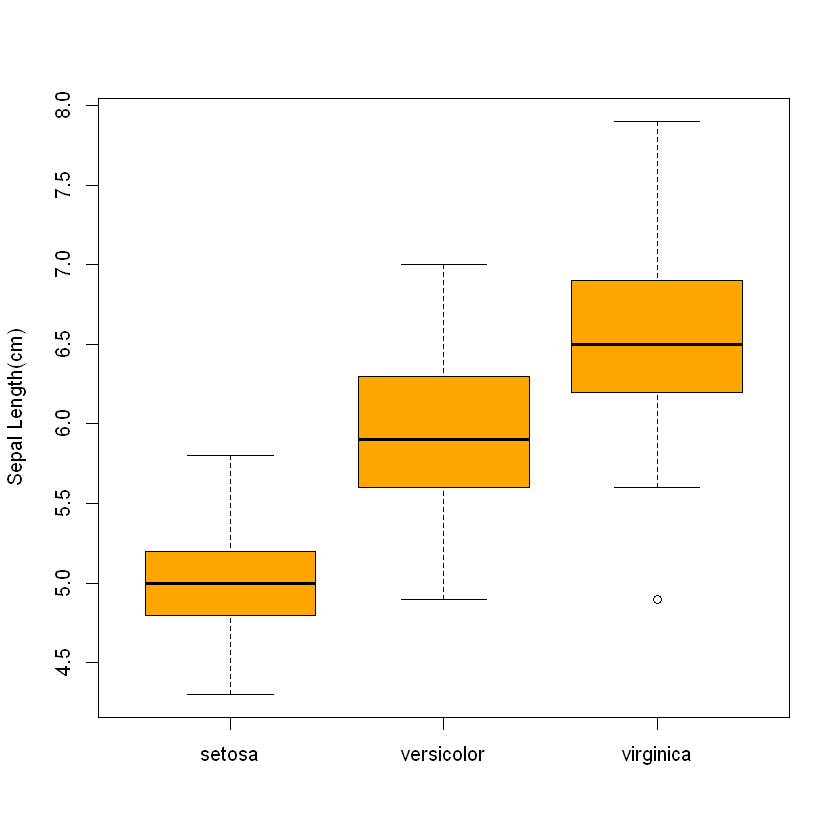

In [12]:
boxplot(iris$Sepal.Length ~ iris$Species, ylab="Sepal Length(cm)", col="orange")

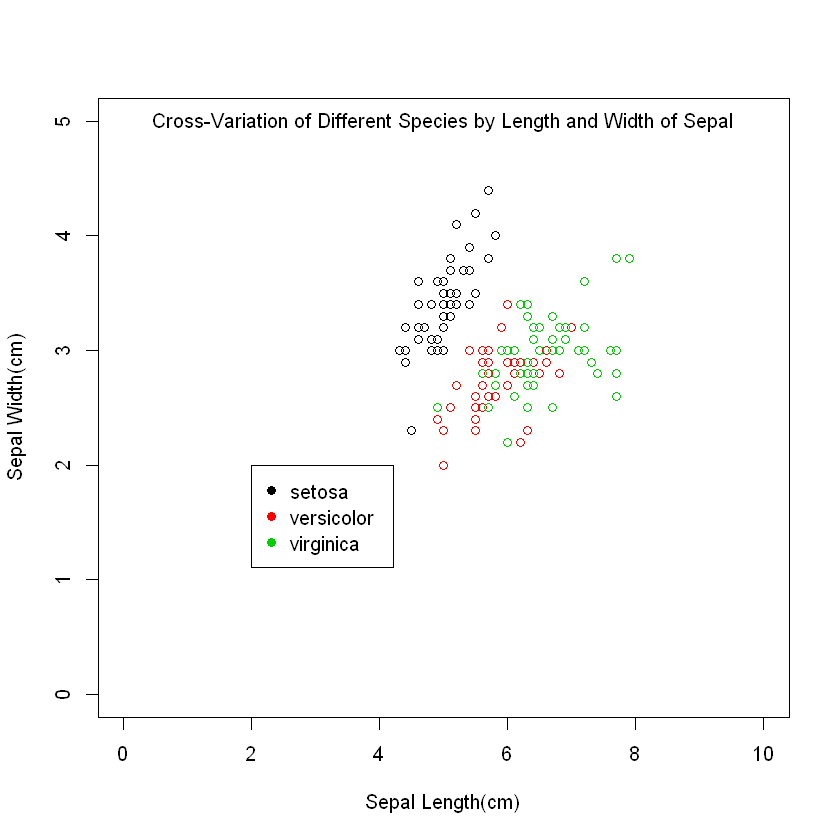

In [13]:
plot(iris$Sepal.Length, iris$Sepal.Width,
     xlab="Sepal Length(cm)", ylab="Sepal Width(cm)",
     xlim=c(0,10),ylim=c(0,5), col=as.numeric(iris$Species))

legend(2,2,pch=16,col=1:3,c("setosa", "versicolor", "virginica"))

text(5,5,"Cross-Variation of Different Species by Length and Width of Sepal")

*As shown in the plot below for petal's length of different species, it is clear that setosa has the least length among the examined flowers. Therefore, Setosa is the only flower with the shortest sepal and petal, while virginica has the longest*

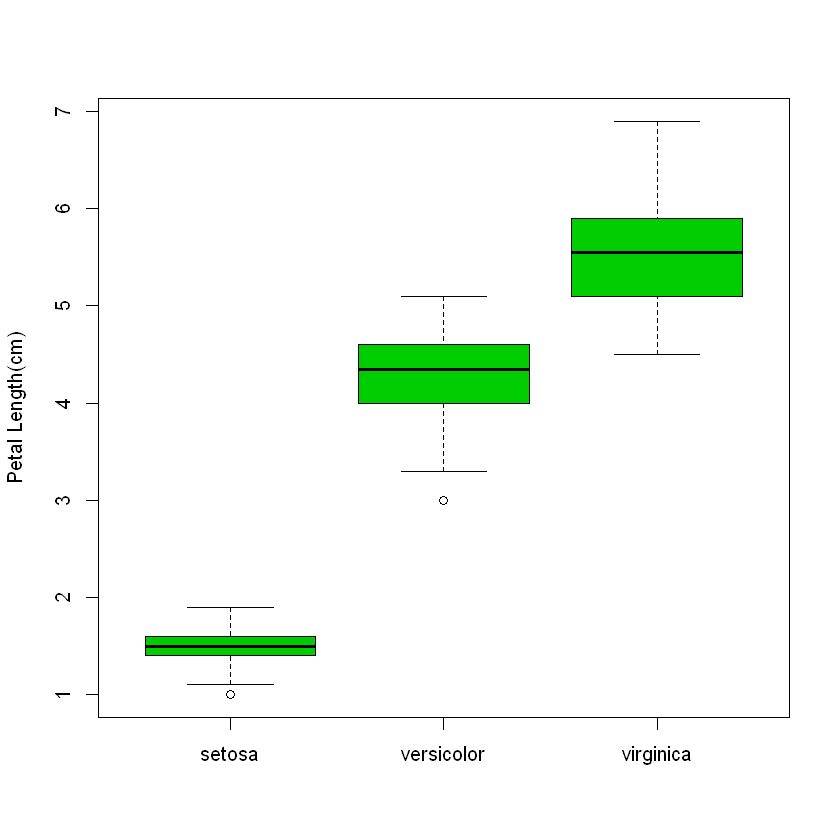

In [14]:
boxplot(iris$Petal.Length ~ iris$Species, ylab="Petal Length(cm)", col=3)

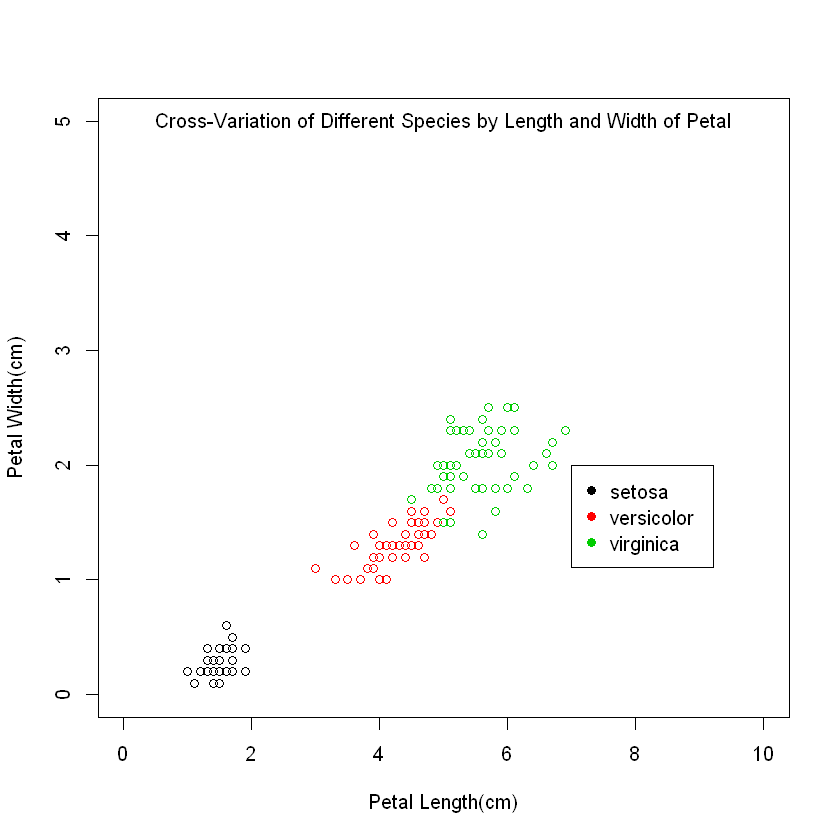

In [15]:
plot(iris$Petal.Length, iris$Petal.Width,
     xlab="Petal Length(cm)", ylab="Petal Width(cm)",
     xlim=c(0,10),ylim=c(0,5), col=as.numeric(iris$Species))

legend(7,2,pch=16,col=1:3,c("setosa", "versicolor", "virginica"))

text(5,5,"Cross-Variation of Different Species by Length and Width of Petal")

In [16]:
library(ggplot2)

In [17]:
countsp <- summarise(iris, count=n())

`geom_smooth()` using method = 'loess'


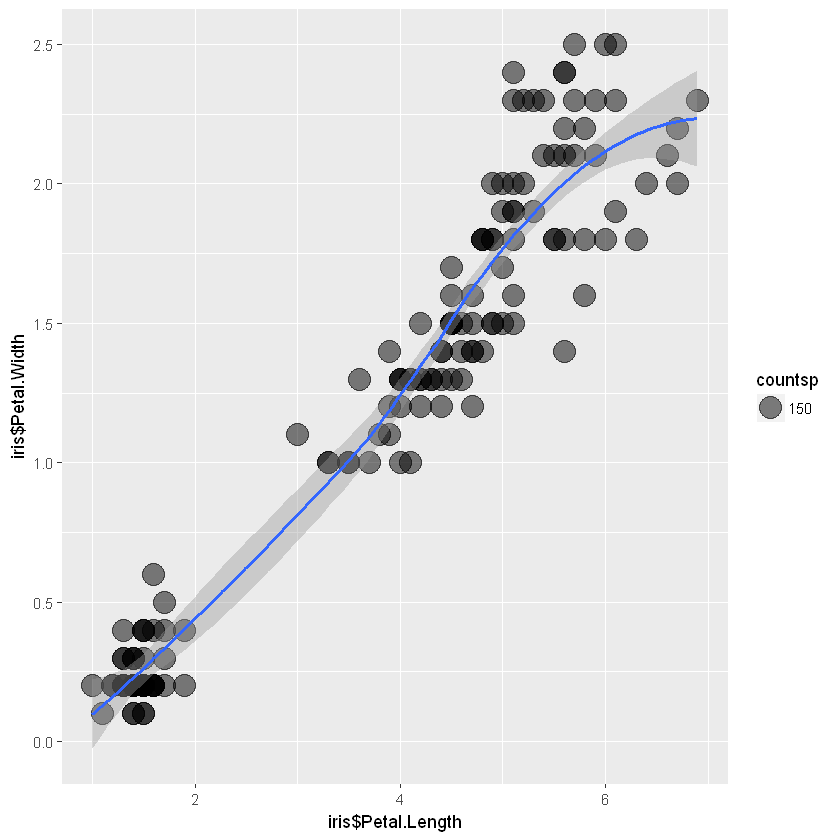

In [18]:
ggplot(iris, aes(iris$Petal.Length, iris$Petal.Width)) + geom_point(aes(size = countsp), alpha = 1/2) + geom_smooth() +scale_size_area()

*The fitted scatter plot above shows the wide variation in petal length relative to the width for all of the flowers species. Some species such as Setosa significantly cluster close the average compared to other variants of flowers.*

### Test of Significance Difference

In [19]:
Species.Ver.Vir <- filter(iris, Species != 'setosa')

In [20]:
head(Species.Ver.Vir,10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.0,3.2,4.7,1.4,versicolor
6.4,3.2,4.5,1.5,versicolor
6.9,3.1,4.9,1.5,versicolor
5.5,2.3,4.0,1.3,versicolor
6.5,2.8,4.6,1.5,versicolor
5.7,2.8,4.5,1.3,versicolor
6.3,3.3,4.7,1.6,versicolor
4.9,2.4,3.3,1.0,versicolor
6.6,2.9,4.6,1.3,versicolor
5.2,2.7,3.9,1.4,versicolor


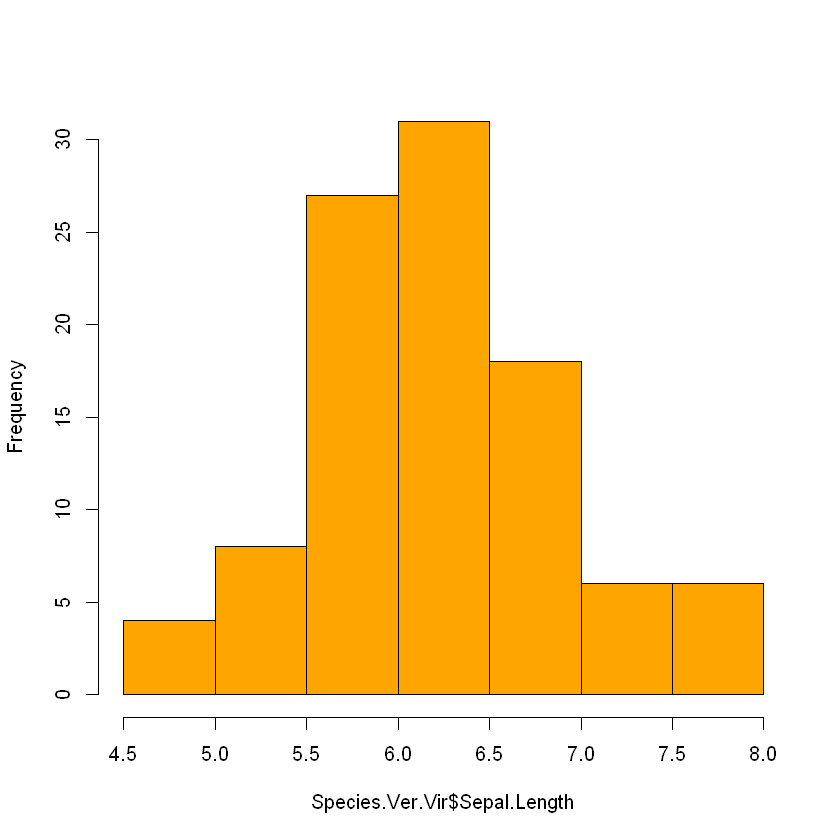

In [21]:
hist(Species.Ver.Vir$Sepal.Length, col='orange', main='')

In [22]:
t.test(Sepal.Length ~ Species, data=Species.Ver.Vir)


	Welch Two Sample t-test

data:  Sepal.Length by Species
t = -5.6292, df = 94.025, p-value = 1.866e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8819731 -0.4220269
sample estimates:
mean in group versicolor  mean in group virginica 
                   5.936                    6.588 


*The tested hypothesis strongly indicate evidence of statistical difference between the average speal length of versicolor and virginican species*

#### Robustness Check #1: Random Selection of Sample

In [23]:
t.test(Sepal.Length ~ sample(Species), data=Species.Ver.Vir)


	Welch Two Sample t-test

data:  Sepal.Length by sample(Species)
t = 0.84363, df = 94.323, p-value = 0.401
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.151587  0.375587
sample estimates:
mean in group versicolor  mean in group virginica 
                   6.318                    6.206 


*Taking a random sample of the data and re-testing the hypothesis yield outcomes that contradict the previous finding. This indicates that there is no sufficient evidence to support the evidence of statistical difference between average sepal length of versicolor and virginican species.*

#### Robustness Check #2: Simulation Approach

In [24]:
VerVir.t <- numeric(10000)
VerVir.pvalue <- numeric(10000)

In [25]:
VVtest <- t.test(Sepal.Length ~ sample(Species), data=Species.Ver.Vir)
names(VVtest)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

In [26]:
for (i in 1:10000){
    VV <- t.test(Sepal.Length ~ sample(Species), data=Species.Ver.Vir)
    VerVir.t[i] <- VV$statistic
}

In [27]:
summary(VerVir.t)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-4.208000 -0.661900  0.000000  0.009218  0.692200  3.905000 

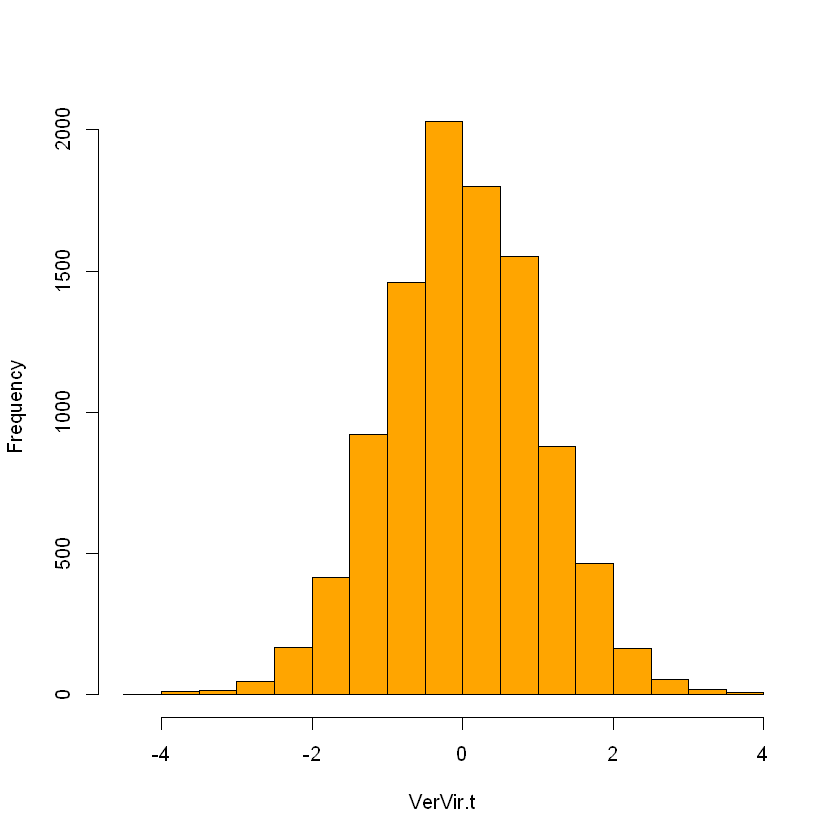

In [28]:
hist(VerVir.t, col='orange', main='')

In [29]:
for (i in 1:10000){
    VV <- t.test(Sepal.Length ~ sample(Species), data=Species.Ver.Vir)
    VerVir.pvalue[i] <- VV$p.value
}
summary(VerVir.pvalue)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000517 0.2414000 0.4905000 0.4985000 0.7418000 1.0000000 

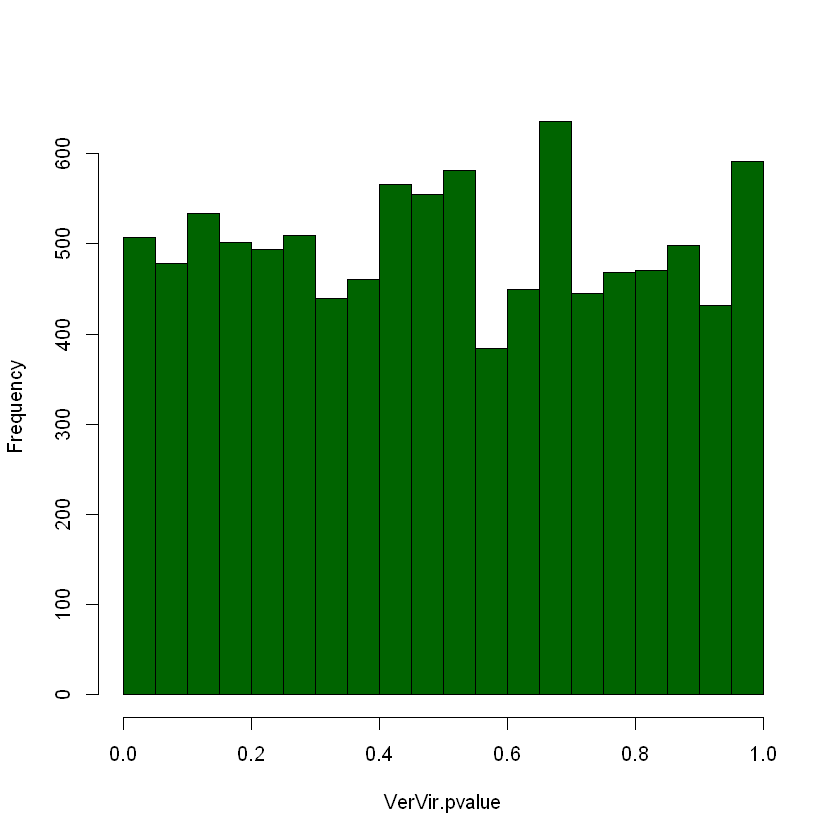

In [30]:
hist(VerVir.pvalue, col='darkgreen', main='')

*Also, outcomes from the simulation further provide evidence that there is no statistical difference between average sepal length of versicolor and virginican species.*

#### Robustness Check #3: Boostrapping Approach
*This approach is employed to test the adequacy of sample size and variation in the mean length ratio of Sepal to Petal across examined species.*

In [31]:
iris$Length.Ratio <- iris$Sepal.Length/iris$Petal.Length
head(iris,5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Length.Ratio
5.1,3.5,1.4,0.2,setosa,3.642857
4.9,3.0,1.4,0.2,setosa,3.500000
4.7,3.2,1.3,0.2,setosa,3.615385
4.6,3.1,1.5,0.2,setosa,3.066667
5.0,3.6,1.4,0.2,setosa,3.571429


In [32]:
summarise(group_by(iris, Species), Avg.Length.Ratio = mean(Length.Ratio), Sd.Length.Ratio = sd(Length.Ratio), Var.Length.Ratio = var(Length.Ratio), count=n())

Species,Avg.Length.Ratio,Sd.Length.Ratio,Var.Length.Ratio,count
setosa,3.464906,0.43021683,0.185086519,50
versicolor,1.400896,0.10456505,0.010933850,50
virginica,1.188350,0.06232545,0.003884462,50


In [33]:
Avg.Length.Ratio <- tapply(iris$Length.Ratio, iris$Species,  mean)
Sd.Length.Ratio <- tapply(iris$Length.Ratio, iris$Species,  sd)

In [34]:
Lower.CI.Baseline <- round(Avg.Length.Ratio - 1.96*Sd.Length.Ratio/sqrt(50),2)
Upper.CI.Baseline <- round(Avg.Length.Ratio + 1.96*Sd.Length.Ratio/sqrt(50),2)

In [35]:
Lower.CI.Baseline; Upper.CI.Baseline

setosa versicolor  virginica 
      3.35       1.37       1.17

setosa versicolor  virginica 
      3.58       1.43       1.21

**Then, boostrapping is conducted to determine the sample adequacy for mean variability in the confidence interval in order to show that the baseline mean is within the range shown above. For instance if the sample size is adequate to establish that setosa length ratio (3.46) is significantly between 3.35 and 3.58**

In [36]:
Setosa.Sepal.Petal.Length.Boostrap <- numeric(10000)

In [37]:
for (i in 1:10000){
    Setosa.Sepal.Petal.Length.Boostrap[i] <- mean(sample(iris$Length.Ratio[iris$Species=='setosa'],50,replace=T))
}

In [38]:
head(Setosa.Sepal.Petal.Length.Boostrap,5)

[1] 3.520404 3.439552 3.387822 3.461636 3.441010

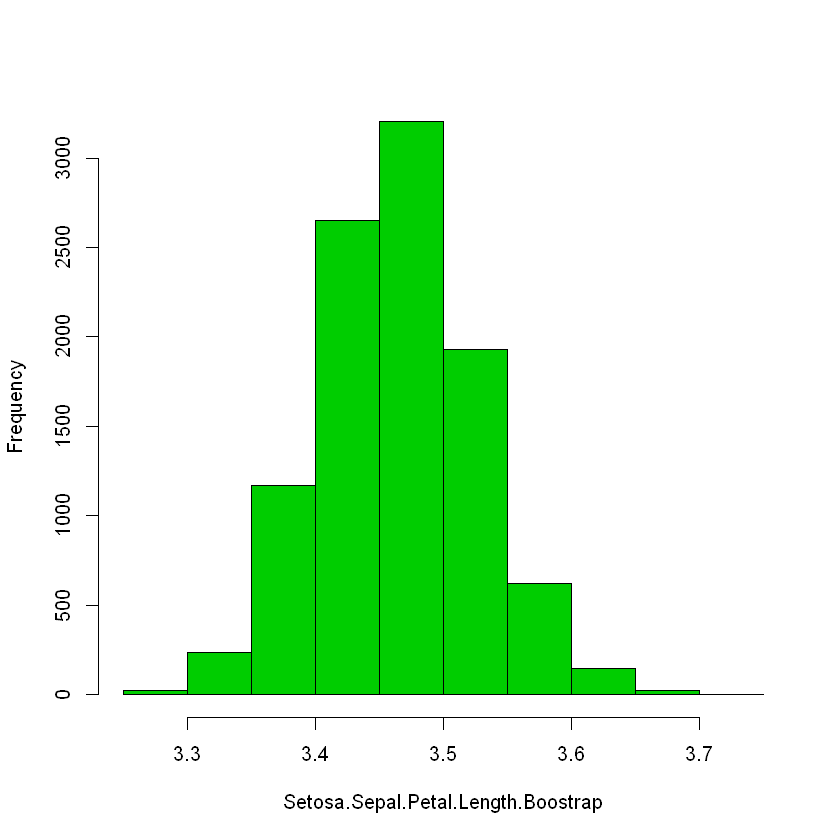

In [39]:
hist(Setosa.Sepal.Petal.Length.Boostrap, col=3, main='')

In [40]:
quantile(Setosa.Sepal.Petal.Length.Boostrap,c(.25,.975))

25%    97.5% 
3.423430 3.587206

*The boostrap result shows that the sample is adequate  to support the evidence that the average setosa length ratio in Sepal and Petal is significantly 3.46*